# MERFISH whole mouse brain: mouse 4 sagittal sample

Original paper: Molecularly defined and spatially resolved cell atlas of the whole mouse brain Xiaowei Zhuang, et al. 2023.
https://www.nature.com/articles/s41586-023-06808-9

## Location at BIL 
Dataset path: /bil/data/29/3c/293cc39ceea87f6d 
Location of this sample (mouse4 sagittal): /bil/data/29/3c/293cc39ceea87f6d/processed_data/counts_updated/counts_mouse4_sagittal.h5ad

## Start Giotto

In [1]:
# Load the package
library(Giotto)

Loading required package: GiottoClass

Giotto Suite 4.2.1



In [2]:
# Check that the Giotto python environment is installed 
checkGiottoEnvironment()

Giotto can access environment found at:
 '/opt/r-miniconda/envs/giotto_env/bin/python'

 If this is the wrong environment, try specifying `envname` param
 or set option "giotto.py_path" with the desired envname or path



[1] TRUE

## Read data

If the Giotto environment is not automatically detected, use: python_path = '/opt/r-miniconda/envs/giotto_env/bin/python'

In [9]:
g <- anndataToGiotto("/bil/data/29/3c/293cc39ceea87f6d/processed_data/counts_updated/counts_mouse4_sagittal.h5ad",
                    python_path = NULL)

a giotto python environment was found

Using python path:
 "/opt/r-miniconda/envs/giotto_env/bin/python"

There are non numeric or integer columns for the spatial location
 input at column position(s): 1
 The first non-numeric column will be considered as a cell ID
 to test for consistency with the expression matrix
 Other non numeric columns will be removed


List item [1]:
 spat_unit: cell
 feat_type: rna

> Cell metadata for spat_unit " cell " and feat_type " rna " already exists and
 will be replaced with new metadata.

Setting cell metadata [cell][rna]

list depth of 2


List item [1]:
 spat_unit: cell
 feat_type: rna

> Feat metadata for spat_unit " cell " and feat_type " rna " already exists and
 will be replaced with new metadata.

Setting feature metadata [cell][rna]


AnnData object successfully converted to Giotto.



In [13]:
# Show object metadata
cell_metadata <- pDataDT(g)

head(cell_metadata)

cell_ID                                 fov volume   center_x center_y
1 104367712102725177087239619995470724493 2   600.9530 4683.354 304.6082
2 177536119734259275144748435471942472531 2   265.7511 4688.833 310.3587
3 256532006537596385088807329967308781746 2   510.2737 4697.296 348.0082
4 28801318882950773770397006451868070066  2   452.6080 4671.473 291.1000
5 301971869963235435117242882149875853185 2   110.6657 4670.496 284.9155
6 59529179184649485193875612467056571460  2   610.4196 4685.849 294.4092
  sample_id   slice_id   fov_x  fov_y
1 sa2_sample2 sa2_slice2 4656.5 139.2
2 sa2_sample2 sa2_slice2 4656.5 139.2
3 sa2_sample2 sa2_slice2 4656.5 139.2
4 sa2_sample2 sa2_slice2 4656.5 139.2
5 sa2_sample2 sa2_slice2 4656.5 139.2
6 sa2_sample2 sa2_slice2 4656.5 139.2

In [5]:
# Get the expression matrix dimensions
dim(getExpression(g)) # 1147 genes 215 300 cells

[1]   1147 215300

## Check instructions

In [6]:
instructions(g, "save_plot")

[1] FALSE

In [7]:
instructions(g, "show_plot")

[1] TRUE

In [49]:
instructions(g, "return_plot")

[1] TRUE

In [10]:
instructions(g, "return_plot") <- FALSE

## Add the spatial information to the object

In [14]:
spatlocs <- data.frame(sdimx = cell_metadata$center_x,
                       sdimy = cell_metadata$center_y,
                       cell_ID = cell_metadata$cell_ID)

spatLocsObj <- createSpatLocsObj(coordinates = spatlocs,
                                 name = "raw")

g <- setSpatialLocations(g,
                         x = spatLocsObj)

There are non numeric or integer columns for the spatial location
 input at column position(s): 3
 The first non-numeric column will be considered as a cell ID
 to test for consistency with the expression matrix
 Other non numeric columns will be removed

> raw already exists and will be replaced with new spatial
 locations

Setting spatial locations [cell] raw



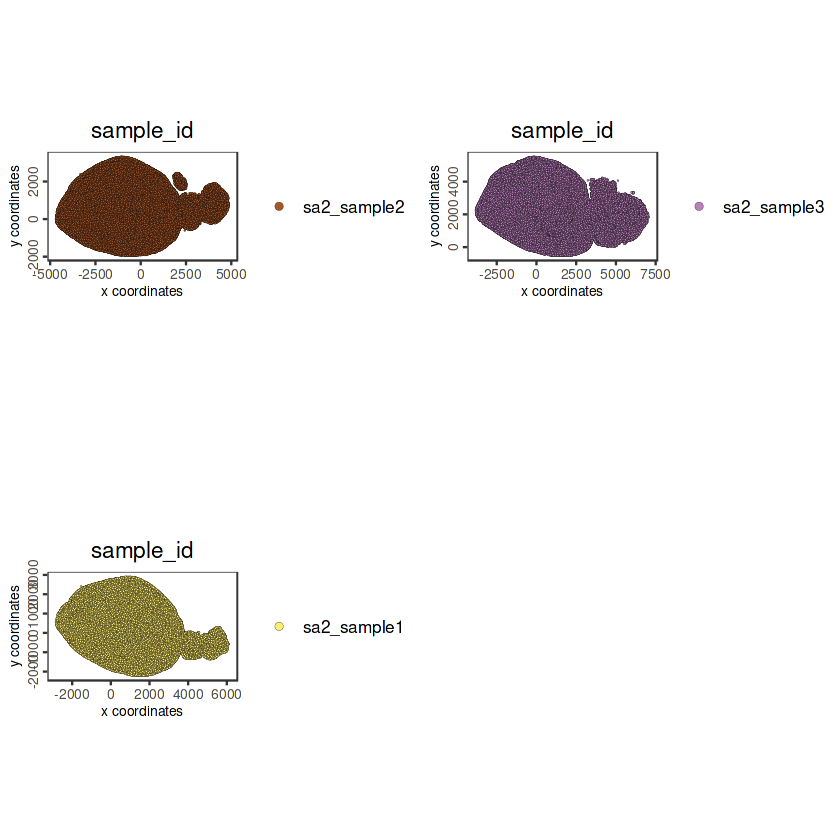

In [15]:
# Plot samples
spatPlot2D(g,
           group_by = "slice_id",
           cell_color = "sample_id",
           point_size = 0.2)

## Subset data to keep only sample 1

In [11]:
g_s1 <- subsetGiotto(g,
                     cell_ids = cell_metadata[cell_metadata$sample_id == "sa2_sample1",]$cell_ID)

## Quality control

Use the function addStatistics() to count the number of features per spot. The statistical information will be stored in the metadata table under the new column “nr_feats”. Then, use this column to visualize the number of features per spot across the sample.

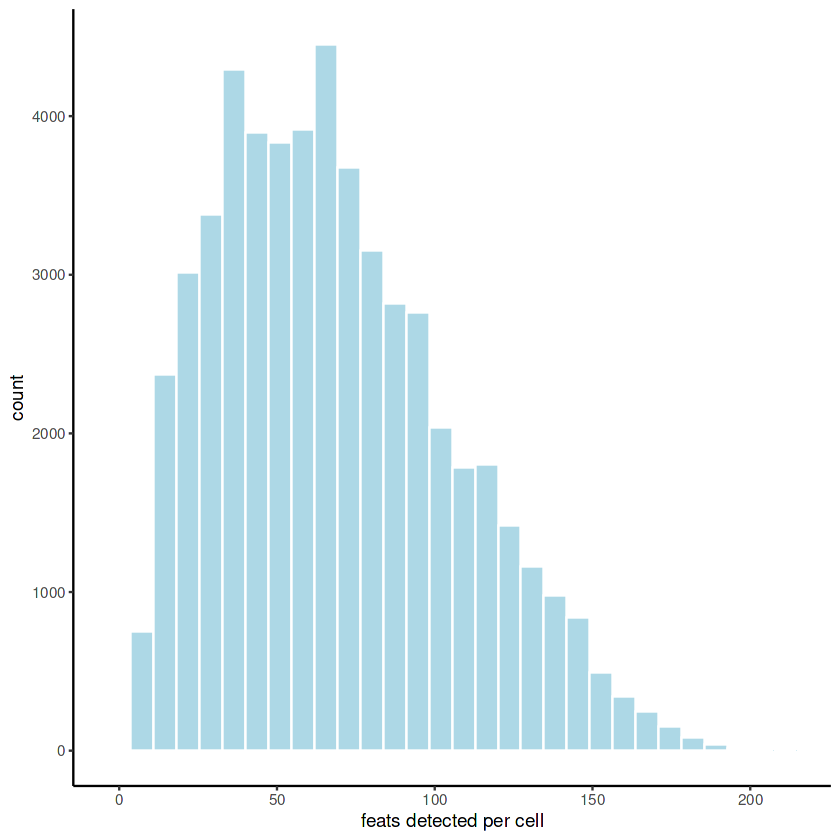

In [12]:
filterDistributions(g_s1,
                    detection = "cells")

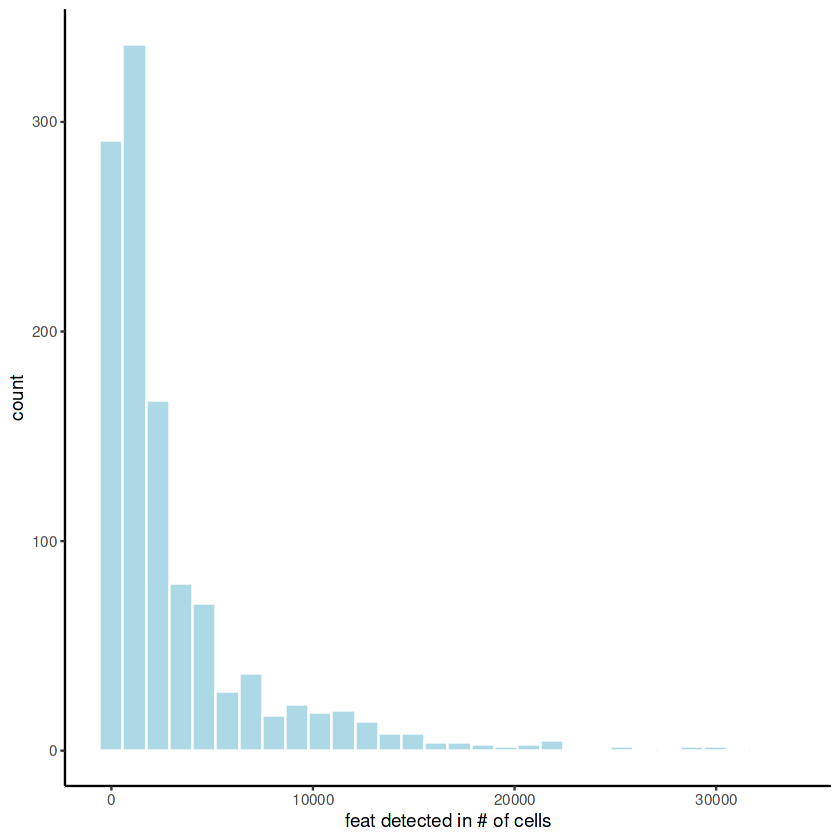

In [13]:
filterDistributions(g_s1,
                    detection = "feats")

calculating statistics for "raw" expression



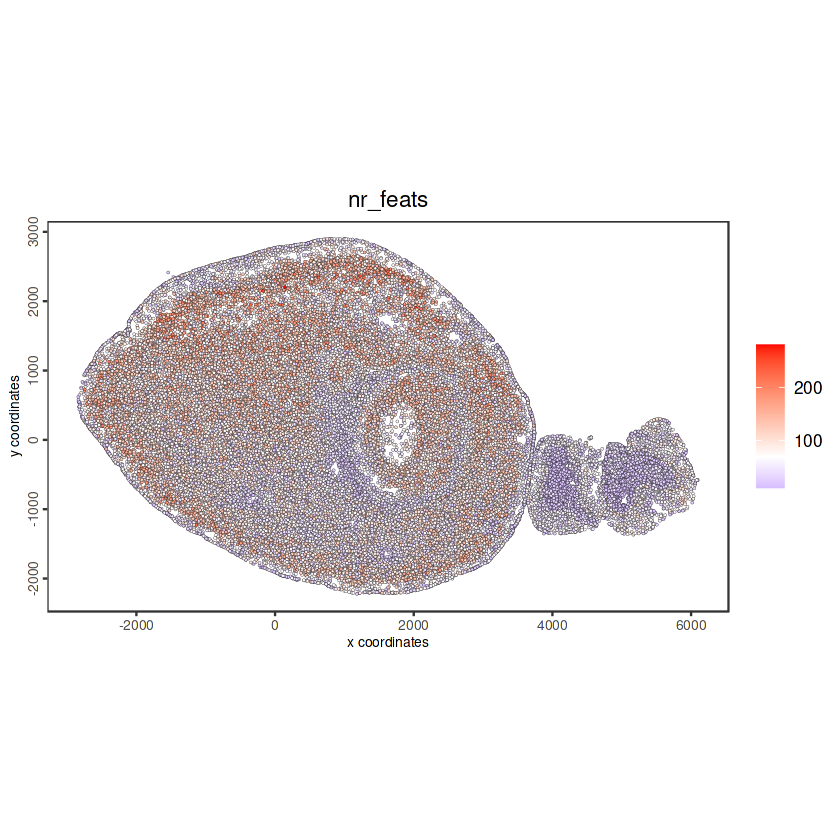

In [7]:
# add statistics
g_s1_stats <- addStatistics(g_s1,
                            expression_values = "raw")

In [ ]:
spatPlot2D(g_s1_stats,
           cell_color = "nr_feats",
           color_as_factor = FALSE,
           point_size = 0.5)

## Filtering

Use the arguments feat_det_in_min_cells and min_det_feats_per_cell to set the minimal number of cells where an individual feature must be detected and the minimal number of features per spot/cell, respectively, to filter the giotto object. All the features and spots/cells under those thresholds will be removed from the sample.

In [15]:
g_s1 <- filterGiotto(g_s1,
                     min_det_feats_per_cell = 10,
                     feat_det_in_min_cells = 100)

completed 1: preparation

completed 2: subset expression data

completed 3: subset spatial locations

completed 4: subset cell metadata

completed 5: subset feature metadata

completed 6: subset spatial network(s)

completed 7: subsetted dimension reductions

completed 8: subsetted nearest network(s)

completed 9: subsetted spatial enrichment results




Feature type:  rna 
Number of cells removed:  547  out of  53723 
Number of feats removed:  0  out of  1147 


## Normalization

Use scalefactor to set the scale factor to use after library size normalization. The default value is 6000, but you can use a different one.

In [16]:
g_s1 <- normalizeGiotto(g_s1,
                        scalefactor = 6000, 
                        verbose = TRUE)

first scale feats and then cells

Setting expression [cell][rna] normalized

Setting expression [cell][rna] scaled



## Dimension reduction (PCA)

Principal Components Analysis (PCA) is applied to reduce the dimensionality of gene expression data by transforming it into principal components, which are linear combinations of genes ranked by the variance they explain, with the first components capturing the most variance.

runPCA() will look for the previous calculation of highly variable features stored as a column in the feature metadata. If the HVF labels are not found in the Giotto object, runPCA() will use all the features available in the sample to calculate the Principal Components.

You can also use specific features for the Principal Components calculation by passing a vector of features in the “feats_to_use” argument.

Finally, create a screeplot to visualize the percentage of variance explained by each component.

"hvf" was not found in the gene metadata information.
 all genes will be used.

Setting dimension reduction [cell][rna] pca

PCA with name: pca already exists and will be used for the screeplot



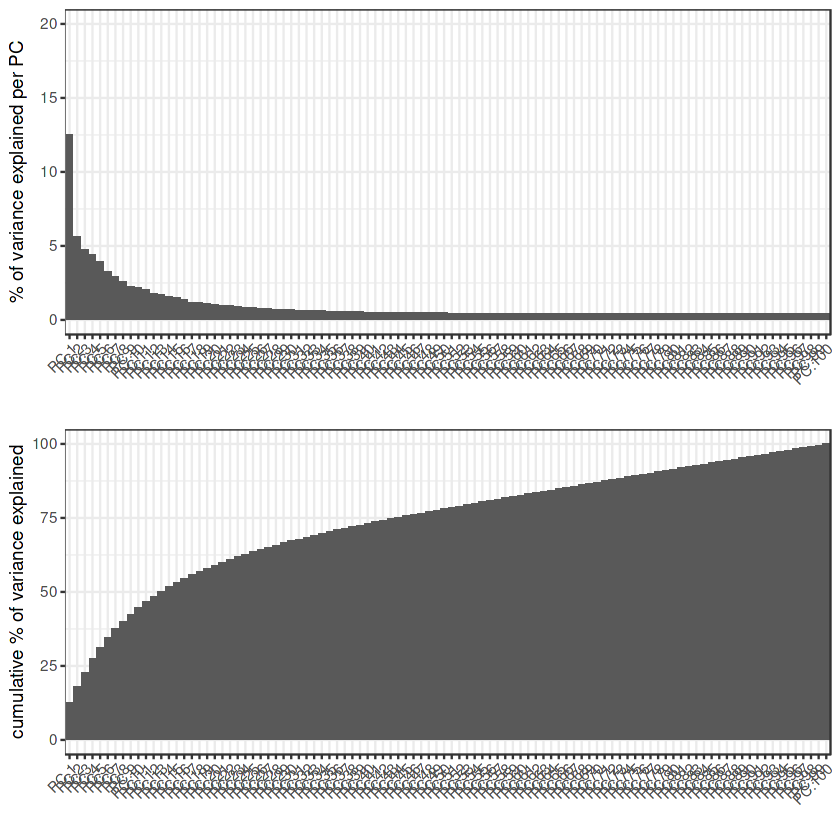

In [17]:
g_s1 <- runPCA(g_s1)

screePlot(g_s1)

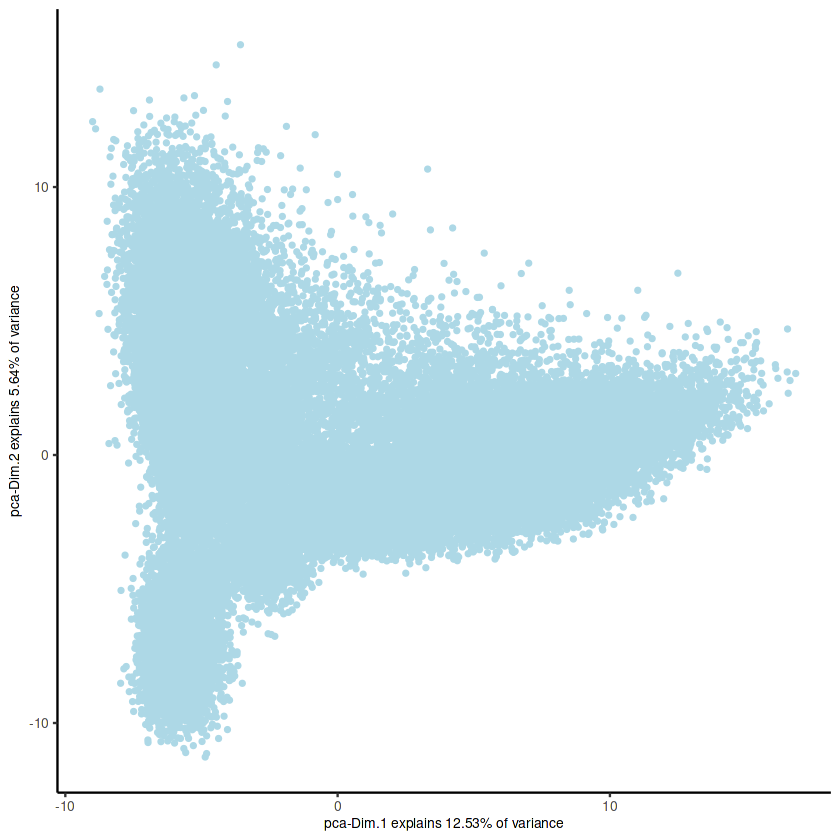

In [18]:
plotPCA(g_s1)

## UMAP

Unlike PCA, Uniform Manifold Approximation and Projection (UMAP) and t-Stochastic Neighbor Embedding (t-SNE) do not assume linearity. After running PCA, UMAP or t-SNE allows you to visualize the dataset in 2D.

In [19]:
g_s1 <- runUMAP(g_s1)

Setting dimension reduction [cell][rna] umap



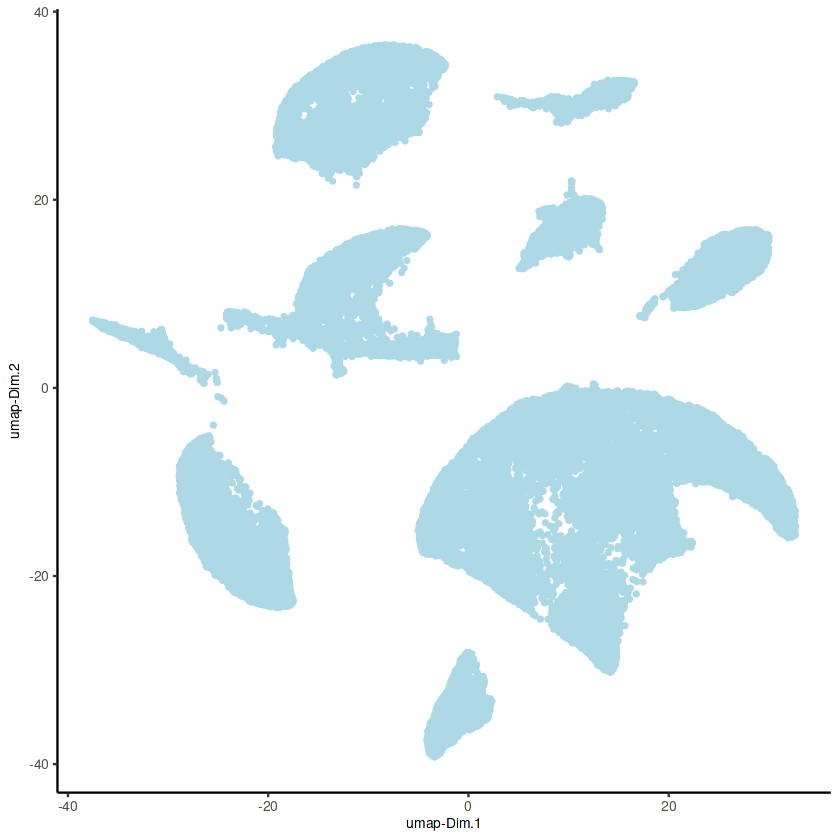

In [20]:
plotUMAP(g_s1)

In [21]:
# tSNE
g_s1 <- runtSNE(g_s1)

Setting dimension reduction [cell][rna] tsne



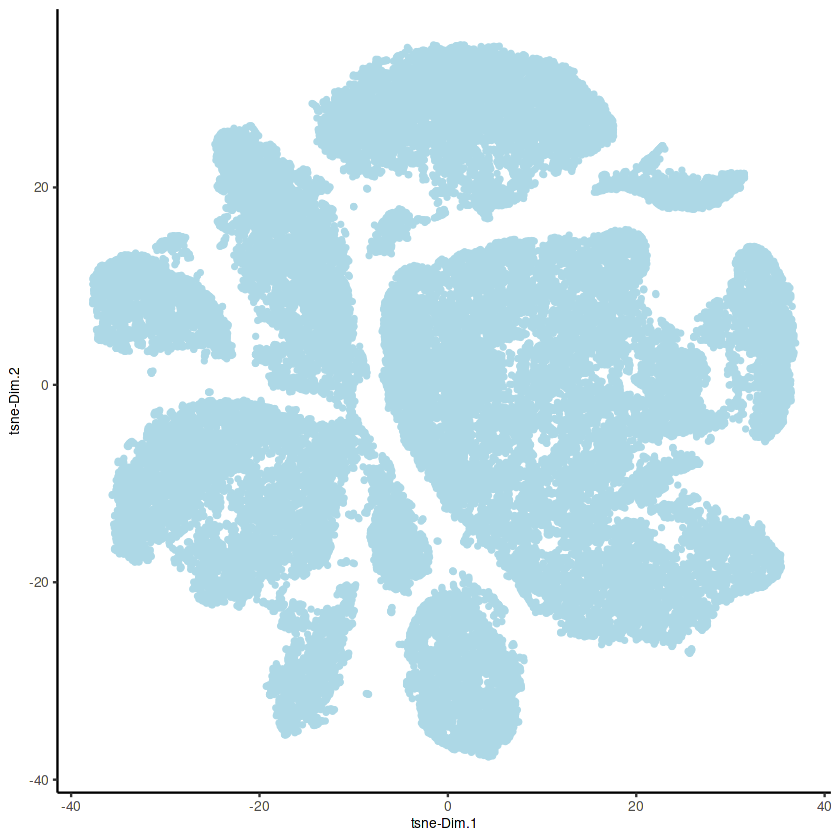

In [22]:
plotTSNE(g_s1)

## Calculate the nearest neighbors

In preparation for the clustering calculation, finding the spots/cells with similar expression patterns is needed. There are two methods available in Giotto:

- Create a sNN network (default)
The shared Nearest Neighbor algorithm defines the similarity between a pair of points in terms of their shared nearest neighbors. That is, the similarity between two points is “confirmed” by their common (shared) near neighbors. If point A is close to point B and if they are both close to a set of points C then we can say that A and B are close with greater confidence since their similarity is “confirmed” by the points in set C. You can find more information about this method here. By default, createNearestNetwork() calculates 30 shared Nearest Neighbors for each spot/cell, but you can modify this number using the “k” parameter.

In [23]:
g_s1 <- createNearestNetwork(g_s1,
                             dimensions_to_use = 1:10, 
                             k = 30)

- Create a kNN network
The K-Nearest Neighbors (kNN) algorithm operates on the principle of likelihood of similarity. It posits that similar data points tend to cluster near each other in space. You can find more information about this method here. By default, createNearestNetwork() finds the 30 K-Nearest Neighbors to each spot/cell, but you can modify this number using the “k” parameter.

In [24]:
g_s1 <- createNearestNetwork(g_s1,
                             dimensions_to_use = 1:10, 
                             k = 30,
                             type = "kNN")

## Leiden clustering

This algorithm is more complicated than the Louvain algorithm and have an accurate and fast result for the computation time. The Leiden algorithm consists of three phases. The first phase is the modularity optimization process, the second phase is the refinement of partition, and the third phase is the community aggregation process. This algorithm performs well on small, medium and large-scale networks. You can find more information about Louvain and Leiden clustering [here](https://iopscience.iop.org/article/10.1088/1742-6596/2129/1/012028/pdf)

In [25]:
# This step may take some time to run)
g_s1 <- doLeidenCluster(g_s1,
                        res = 1)

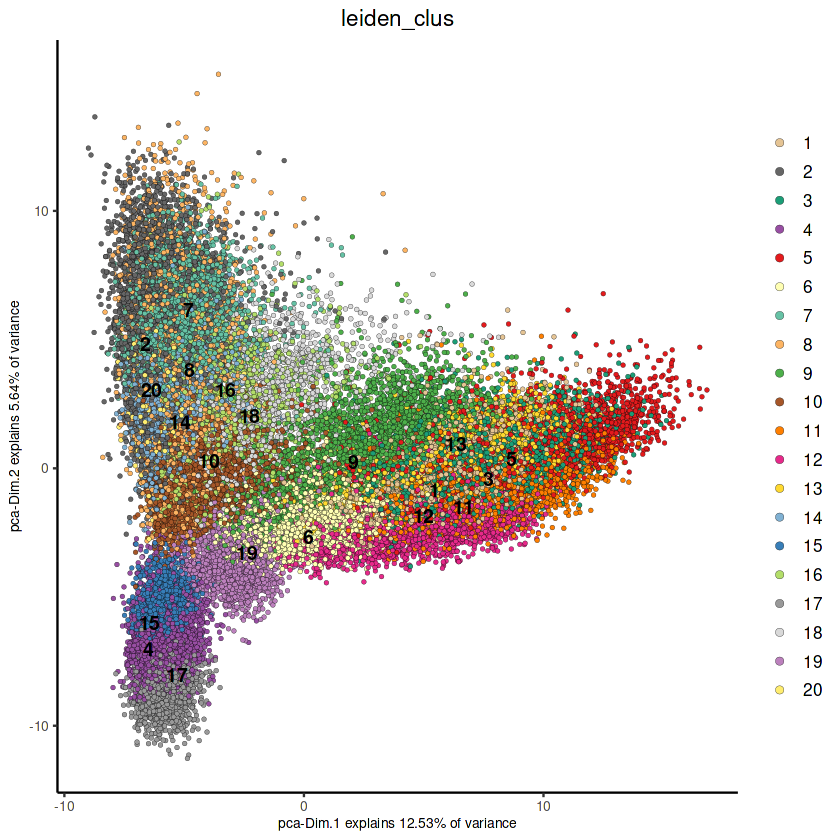

In [26]:
# Visualization
plotPCA(g_s1,
        cell_color = "leiden_clus")

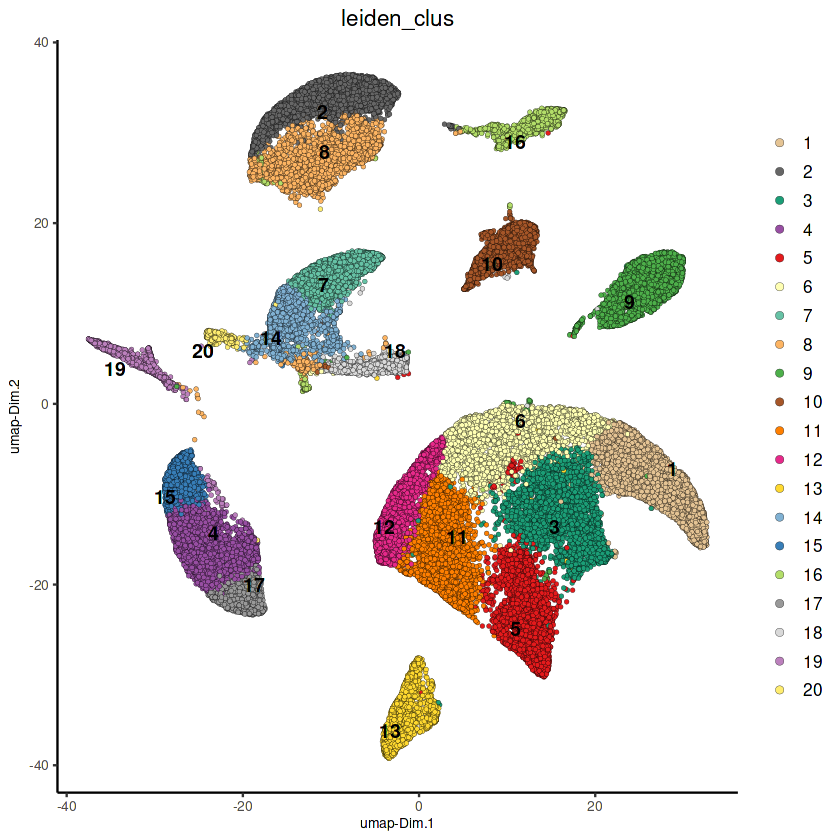

In [27]:
plotUMAP(g_s1,
         cell_color = "leiden_clus")

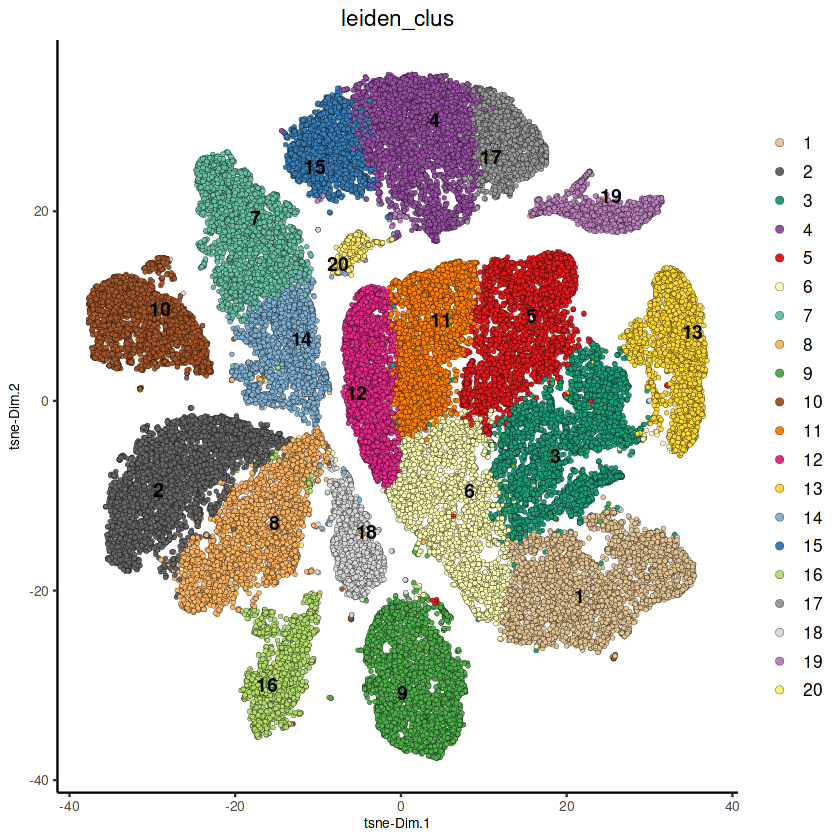

In [28]:
plotTSNE(g_s1,
         cell_color = "leiden_clus")

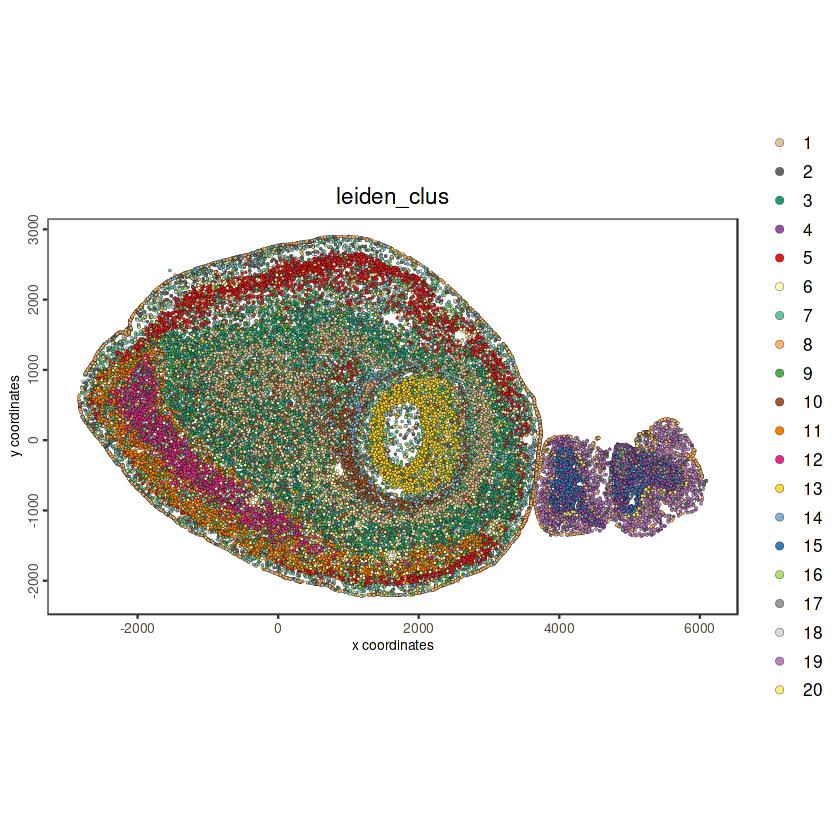

In [6]:
spatPlot2D(g_s1,
           cell_color = "leiden_clus",
           point_size = 0.5)

## Finding differentially expressed genes

- The Gini method identifies genes that are very selectively expressed in a specific cluster, however not always expressed in all cells of that cluster. In other words, highly specific but not necessarily sensitive at the single-cell level.

Calculate the top marker genes per cluster using the gini method.

In [30]:
markers_gini <- findMarkers_one_vs_all(gobject = g_s1,
                                        method = "gini",
                                        expression_values = "normalized",
                                        cluster_column = "leiden_clus",
                                        min_feats = 10)

topgenes_gini <- markers_gini[, head(.SD, 3), by = "cluster"]$feats

start with cluster  1start with cluster  2start with cluster  3start with cluster  4start with cluster  5start with cluster  6start with cluster  7start with cluster  8start with cluster  9start with cluster  10start with cluster  11start with cluster  12start with cluster  13start with cluster  14start with cluster  15start with cluster  16start with cluster  17start with cluster  18start with cluster  19start with cluster  20

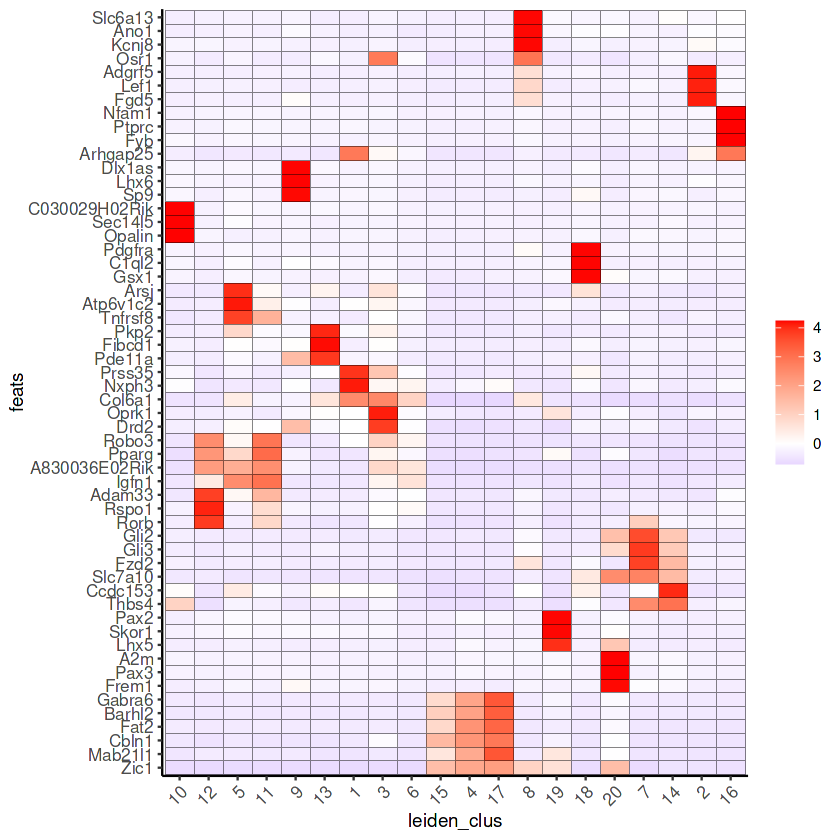

In [35]:
# Use the cluster IDs to create a heatmap with the normalized expression of the top-expressed genes per cluster.
plotMetaDataHeatmap(g_s1,
                    selected_feats = unique(topgenes_gini),
                    metadata_cols = "leiden_clus")

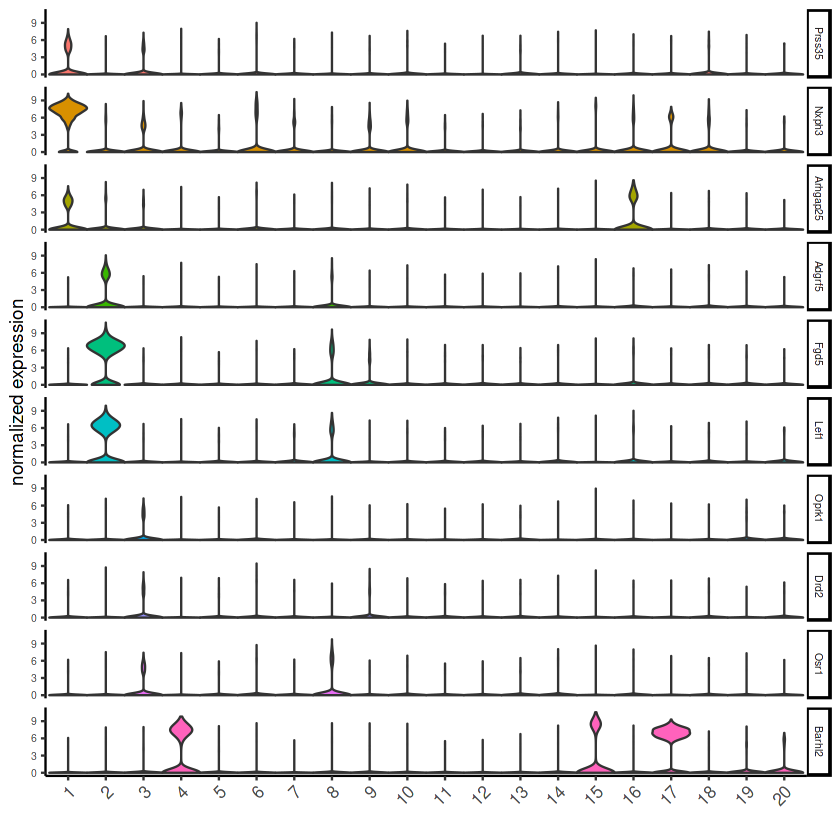

In [36]:
violinPlot(g_s1, 
           feats = unique(topgenes_gini)[1:10], 
           cluster_column = "leiden_clus",
           strip_text = 6, 
           strip_position = "right")

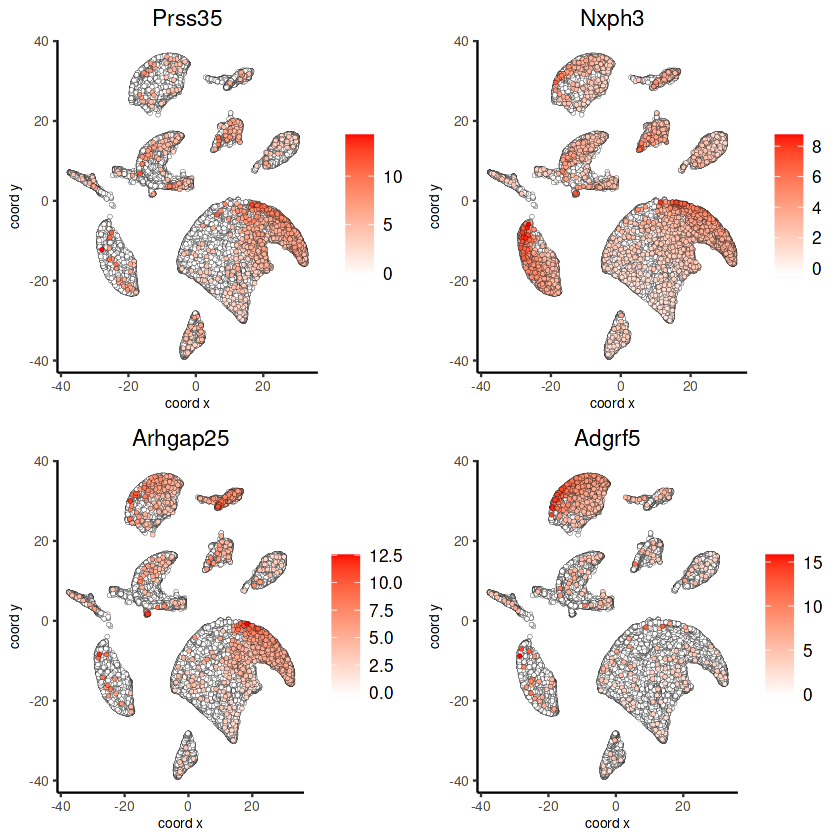

In [40]:
# Visualize the scaled expression spatial distribution of the top-expressed genes across the sample.
dimFeatPlot2D(g_s1, 
              expression_values = "scaled",
              feats = unique(topgenes_gini)[1:4],
              cow_n_col = 2, 
              point_size = 1)

- The Scran method is preferred for robust differential expression analysis, especially when addressing technical variability or differences in sequencing depth across spatial locations.

In [41]:
markers_scran <- findMarkers_one_vs_all(gobject = g_s1,
                                        method = "scran",
                                        expression_values = "normalized",
                                        cluster_column = "leiden_clus",
                                        min_feats = 10)

topgenes_scran <- markers_scran[, head(.SD, 3), by = "cluster"]$feats

using 'Scran' to detect marker feats. If used in published
      research, please cite: Lun ATL, McCarthy DJ, Marioni JC (2016).
      'A step-by-step workflow for low-level analysis of single-cell RNA-seq
      data with Bioconductor.'
      F1000Res., 5, 2122. doi: 10.12688/f1000research.9501.2. 



start with cluster  1start with cluster  2start with cluster  3start with cluster  4start with cluster  5start with cluster  6start with cluster  7start with cluster  8start with cluster  9start with cluster  10start with cluster  11start with cluster  12start with cluster  13start with cluster  14start with cluster  15start with cluster  16start with cluster  17start with cluster  18start with cluster  19start with cluster  20

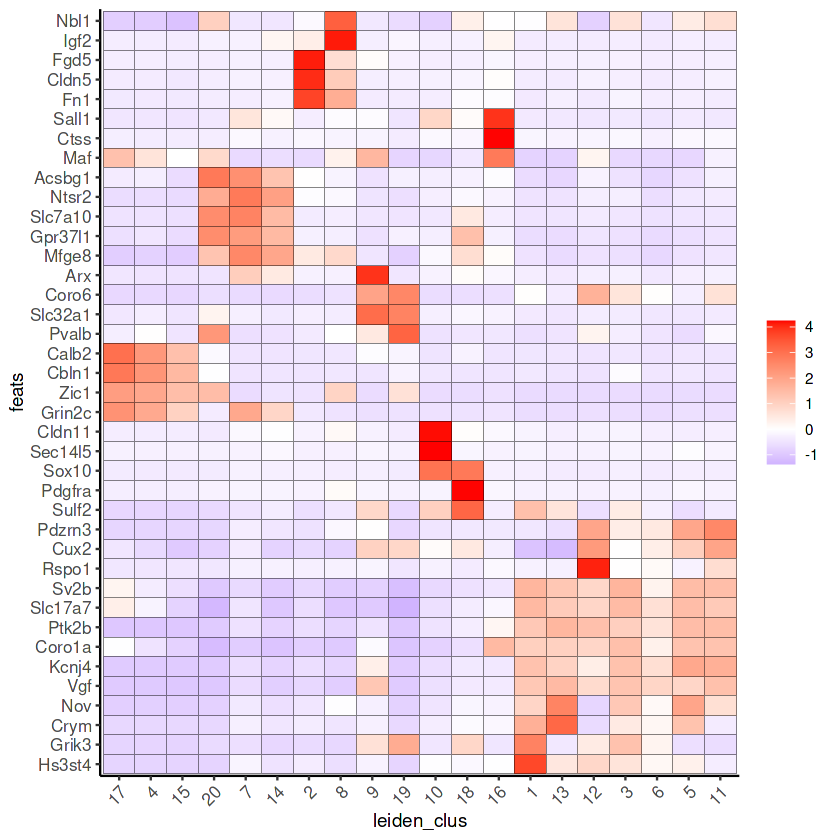

In [42]:
# Use the cluster IDs to create a heatmap with the normalized expression of the top-expressed genes per cluster.
plotMetaDataHeatmap(g_s1,
                    selected_feats = unique(topgenes_scran),
                    metadata_cols = "leiden_clus")

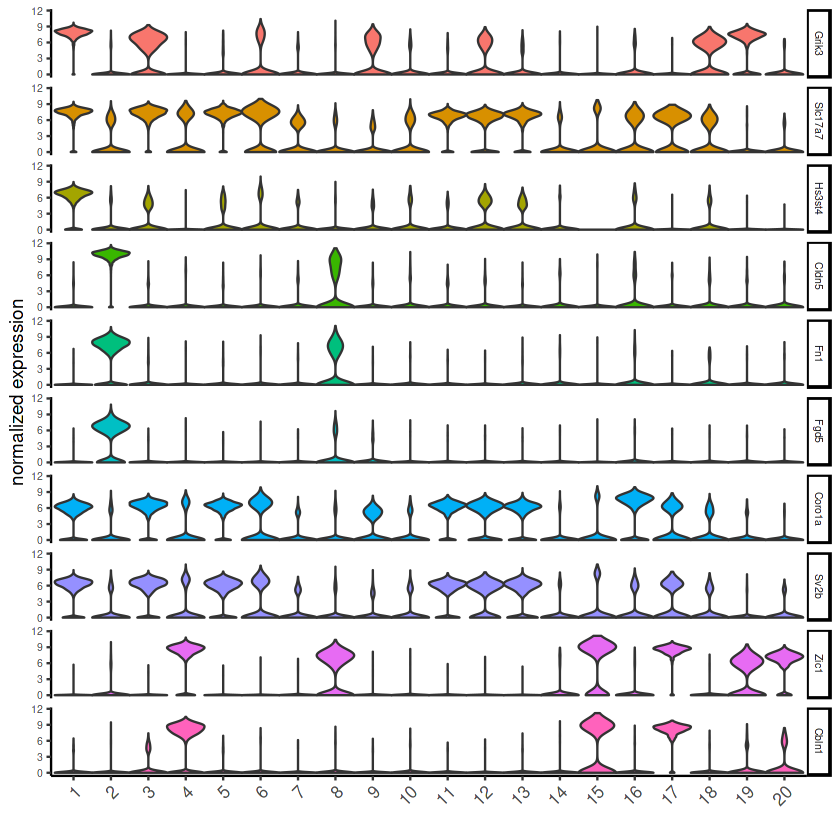

In [43]:
violinPlot(g_s1, 
           feats = unique(topgenes_scran)[1:10], 
           cluster_column = "leiden_clus",
           strip_text = 6, 
           strip_position = "right")

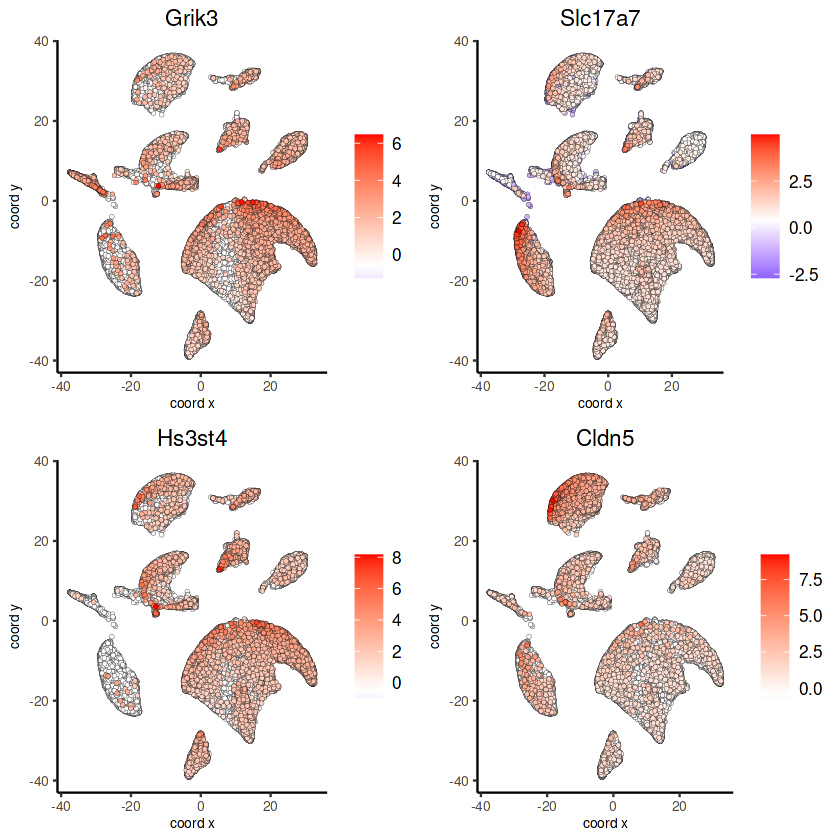

In [44]:
# Visualize the scaled expression spatial distribution of the top-expressed genes across the sample.
dimFeatPlot2D(g_s1, 
              expression_values = "scaled",
              feats = unique(topgenes_scran)[1:4],
              cow_n_col = 2, 
              point_size = 1)

## Finding spatial genes

When having the spatial location of each spot/cell, you can look for genes that follow and share particular spatial distributions.

### Create a spatial network
createSpatialNetwork() creates a spatial network connecting single-cells based on their physical distance to each other. There are two methods available: Delaunay and kNN. For the Delaunay method, neighbors will be decided by Delaunay triangulation and a maximum distance criterion. For the kNN method, the number of neighbors can be determined by k, or the maximum distance from each cell with or without setting a minimum k for each cell.

spatial_network has already been used, will be overwritten

> " spatial_network " already exists and will be replaced with new spatial
 network

Setting spatial network [cell] spatial_network



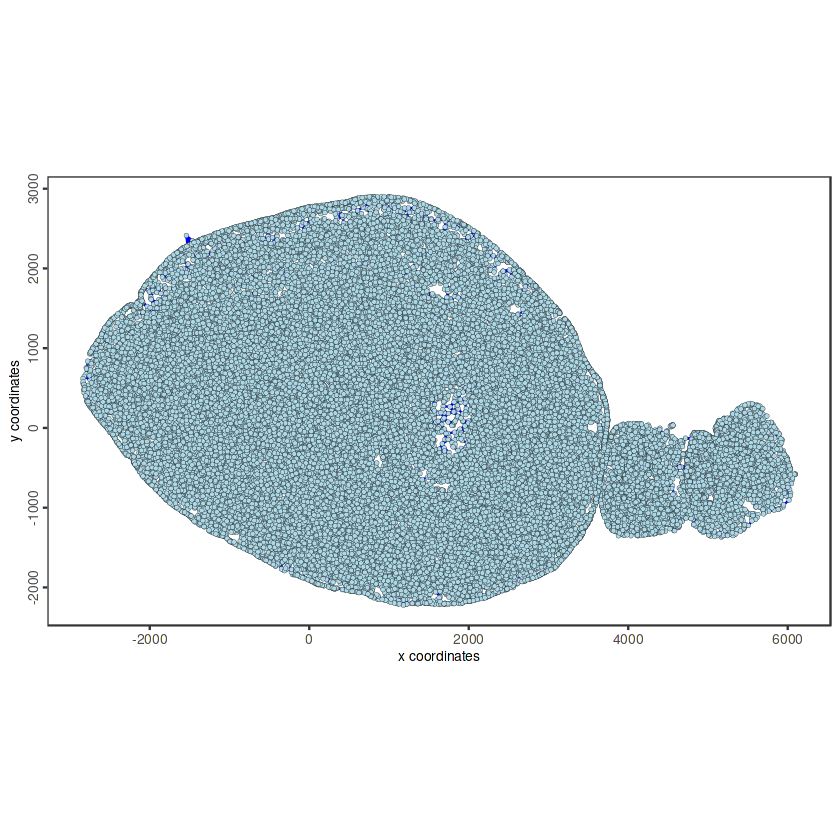

In [46]:
g_s1 <- createSpatialNetwork(gobject = g_s1,
                             method = "kNN", 
                             k = 6,
                             maximum_distance_knn = 400,
                             name = "spatial_network")

spatPlot2D(gobject = g_s1,  
           point_size = 0.5,
           show_network = TRUE,
           network_color = "blue", 
           spatial_network_name = "spatial_network")

### Find spatial genes

Use the rank binarization to rank genes on the spatial dataset depending on whether they exhibit a spatial pattern location or not. This step may take a few minutes to run.

In [47]:
ranktest <- binSpect(g_s1, 
                     bin_method = "rank",
                     calc_hub = TRUE, 
                     hub_min_int = 5,
                     spatial_network_name = "spatial_network")


This is the single parameter version of binSpect


1. matrix binarization complete


2. spatial enrichment test completed


3. (optional) average expression of high
 expressing cells calculated


4. (optional) number of high expressing cells
 calculated



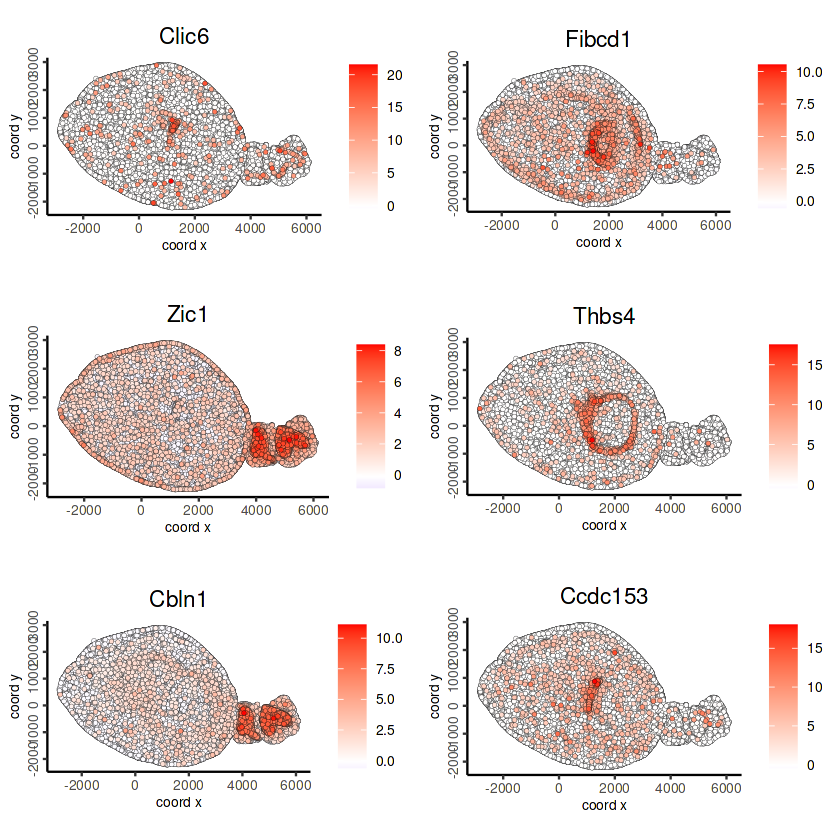

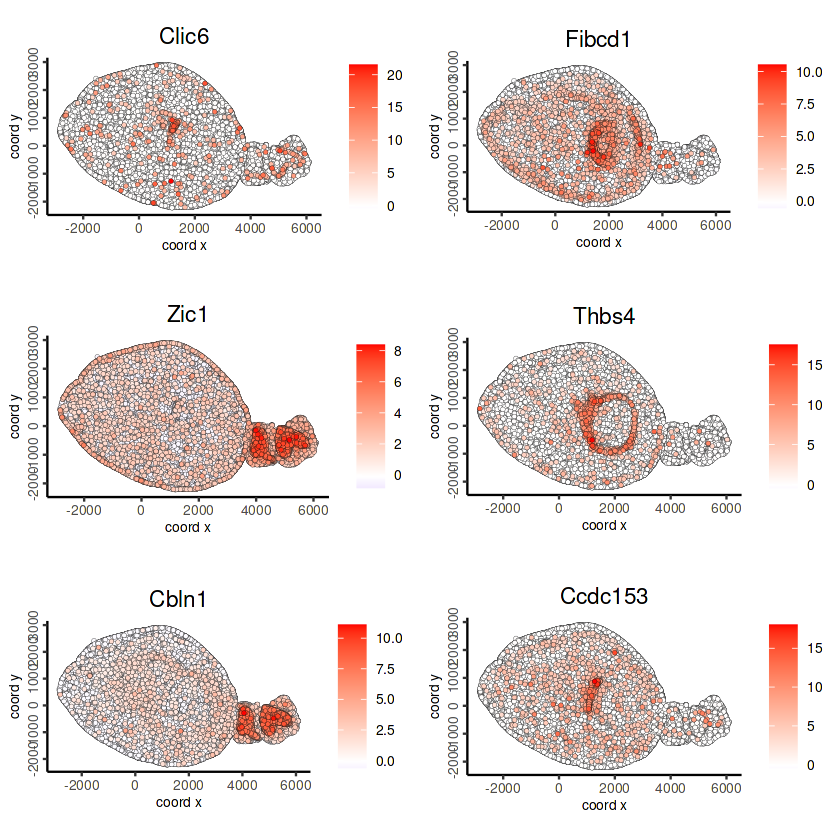

In [51]:
# Plot the scaled expression of genes with the highest probability of being spatial genes.
spatFeatPlot2D(g_s1, 
               expression_values = "scaled",
               feats = ranktest$feats[1:6], 
               cow_n_col = 2, 
               point_size = 1)

### Spatial Co-Expression modules

Once we have found spatial genes, we can group those genes with similar spatial patterns into co-expression modules.

In [52]:
# Cluster the top 100 spatial genes into 5 clusters
ext_spatial_genes <- ranktest[1:100,]$feats

In [53]:
# Use detectSpatialCorGenes() to calculate pairwise distances between genes.
spat_cor_netw_DT <- detectSpatialCorFeats(g_s1,
                                          method = "network",
                                          spatial_network_name = "spatial_network",
                                          subset_feats = ext_spatial_genes)

In [54]:
# Cluster spatial genes.
spat_cor_netw_DT <- clusterSpatialCorFeats(spat_cor_netw_DT, 
                                           name = "spat_netw_clus", 
                                           k = 5)

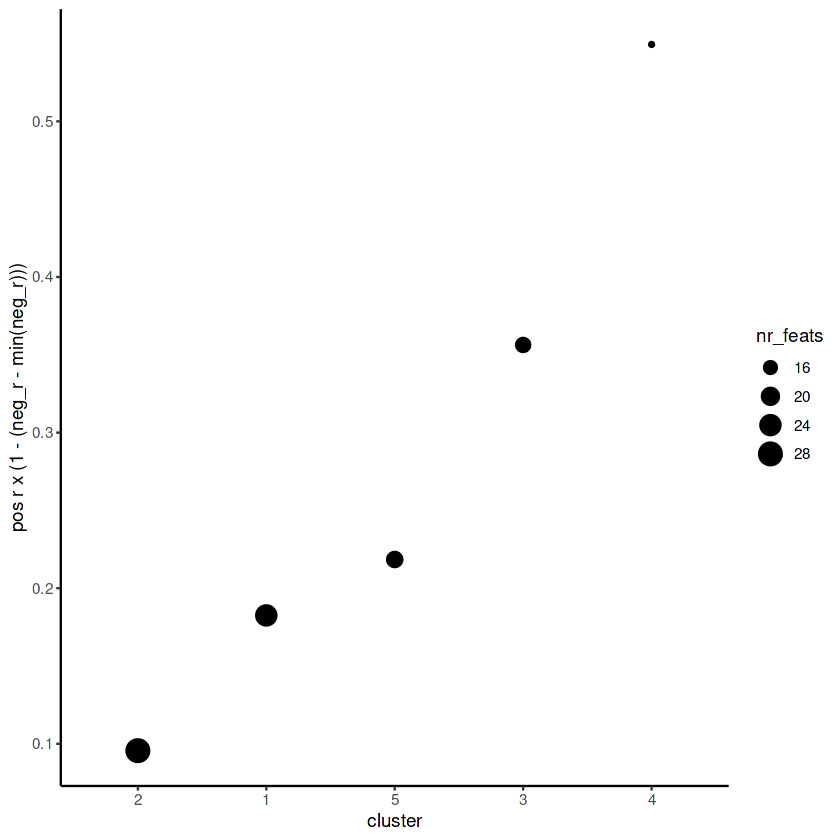

In [56]:
# Rank spatial correlated clusters and show genes for selected clusters.
netw_ranks <- rankSpatialCorGroups(g_s1,
                                   spatCorObject = spat_cor_netw_DT, 
                                   use_clus_name = "spat_netw_clus")

In [57]:
# Plot the correlation and number of spatial genes in each cluster.
top_netw_spat_cluster <- showSpatialCorFeats(spat_cor_netw_DT, 
                                             use_clus_name = "spat_netw_clus",
                                             selected_clusters = 6, 
                                             show_top_feats = 1)

In [58]:
# Create the metagene enrichment score per co-expression cluster.
cluster_genes_DT <- showSpatialCorFeats(spat_cor_netw_DT, 
                                        use_clus_name = "spat_netw_clus", 
                                        show_top_feats = 1)

cluster_genes <- cluster_genes_DT$clus 
names(cluster_genes) <- cluster_genes_DT$feat_ID

g_s1 <- createMetafeats(g_s1, 
                        feat_clusters = cluster_genes, 
                        name = "cluster_metagene")

calculating metafeature: 1

calculating metafeature: 2

calculating metafeature: 3

calculating metafeature: 4

calculating metafeature: 5



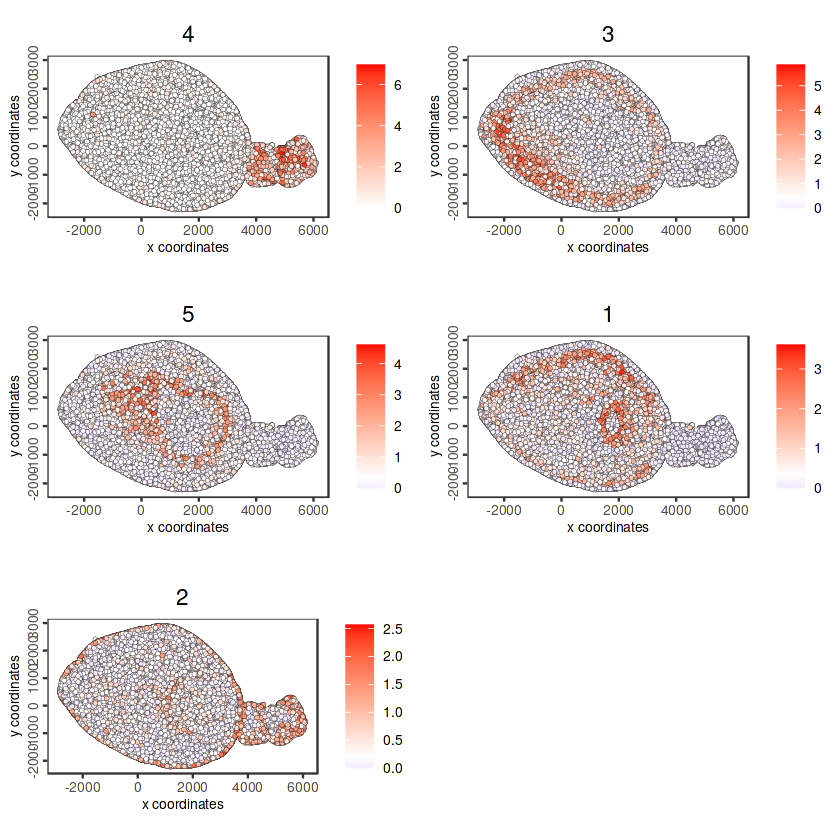

In [60]:
# Plot the spatial distribution of the metagene enrichment scores of each spatial co-expression cluster.
spatCellPlot(g_s1,
             spat_enr_names = "cluster_metagene",
             cell_annotation_values = netw_ranks$clusters,
             point_size = 0.5, 
             cow_n_col = 2)

## Spatially informed clusters

Once we have identified spatial genes, we can use them to re-calculate the clusters based only on the expression information that follows spatial patterns.

In [79]:
# Get the top 10 genes per spatial co-expression cluster
coexpr_dt <- data.table::data.table(
  genes = names(spat_cor_netw_DT$cor_clusters$spat_netw_clus),
  cluster = spat_cor_netw_DT$cor_clusters$spat_netw_clus)

data.table::setorder(coexpr_dt, cluster)

top20_coexpr_dt <- coexpr_dt[, head(.SD, 20) , by = cluster]

spatial_genes <- unique(top20_coexpr_dt$genes)


[1] "Grp"      "Endou"    "Otof"     "Penk"     "Ndst4"    "Ankfn1"  
 [7] "Kcng1"    "Dchs2"    "Crym"     "Pde11a"   "Osr1"     "Pvalb"   
[13] "Skor1"    "Igf2"     "Serpinf1" "Lhx5"     "Pax3"     "Kit"     
[19] "Bmp4"     "Vwa5b1"   "Lamp5"    "Cux2"     "Rspo1"    "Cbln4"   
[25] "Fam19a2"  "Pdzrn3"   "Scn4b"    "Tmem215"  "Slc30a3"  "Kcnab3"  
[31] "Barhl2"   "Zic1"     "Cbln1"    "En2"      "Unc13c"   "Chn2"    
[37] "Syt2"     "Mab21l1"  "Cnpy1"    "Fat2"     "Nxph4"    "Drd2"    
[43] "Nr4a2"    "Rxfp1"    "Nxph3"    "Dlk1"     "Hs3st4"   "Baiap3"  
[49] "Rprm"     "Col23a1"

### Re-calculate the clustering

Use the spatial genes to calculate again the principal components, umap, network and clustering.

In [94]:
spatial_genes <- ranktest[1:200,]$feats

In [95]:
g_s1 <- runPCA(gobject = g_s1,
               feats_to_use = spatial_genes,
               name = "custom_pca",
               ncp = 50)

a custom vector of genes will be used to subset the matrix

> custom_pca already exists and will be replaced with
 new dimension reduction object

Setting dimension reduction [cell][rna] custom_pca



PCA with name: custom_pca already exists and will be used for the screeplot



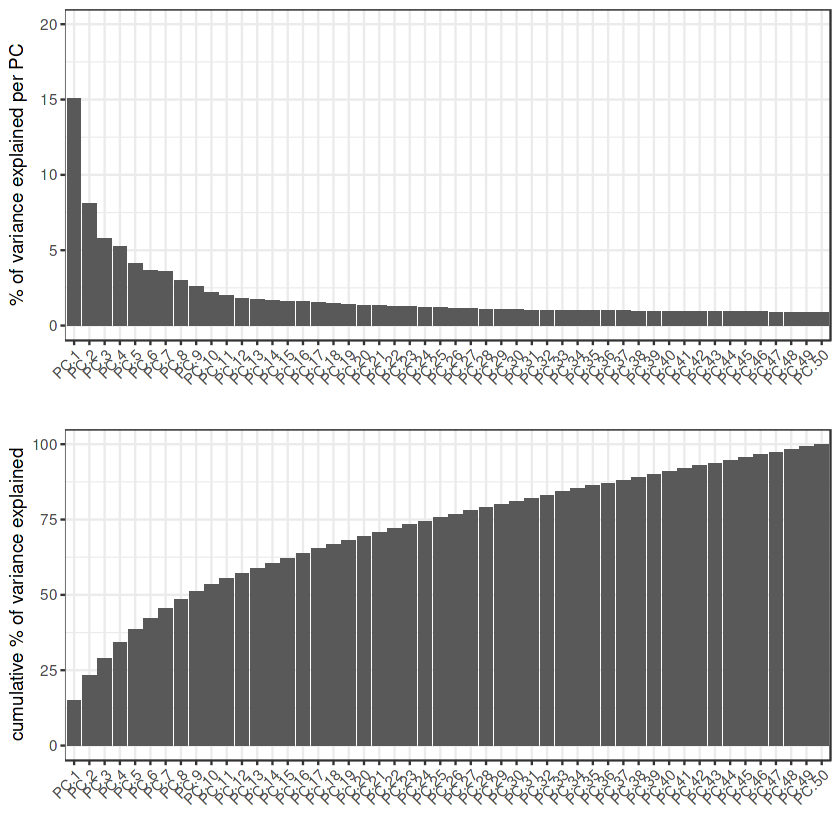

In [96]:
screePlot(g_s1, dim_reduction_name = "custom_pca")

In [97]:
g_s1 <- runUMAP(g_s1, 
                dim_reduction_name = "custom_pca", 
                dimensions_to_use = 1:20,
                name = "custom_umap")

> custom_umap already exists and will be replaced with
 new dimension reduction object

Setting dimension reduction [cell][rna] custom_umap



In [98]:
g_s1 <- createNearestNetwork(gobject = g_s1,
                             dim_reduction_name = "custom_pca",
                             dimensions_to_use = 1:20, 
                             k = 5,
                             name = "custom_NN")

> 'custom_NN' already exists and will be replaced with
 new nearest neighbor network



In [105]:
g_s1 <- doLeidenCluster(gobject = g_s1, 
                        network_name = "custom_NN",
                        resolution = 0.1, 
                        name = "custom_leiden")

custom_leiden  has already been used, will be overwritten

In [106]:
length(unique(pDataDT(g_s1)$custom_leiden))

[1] 17

Warning message:
“ggrepel: 1 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


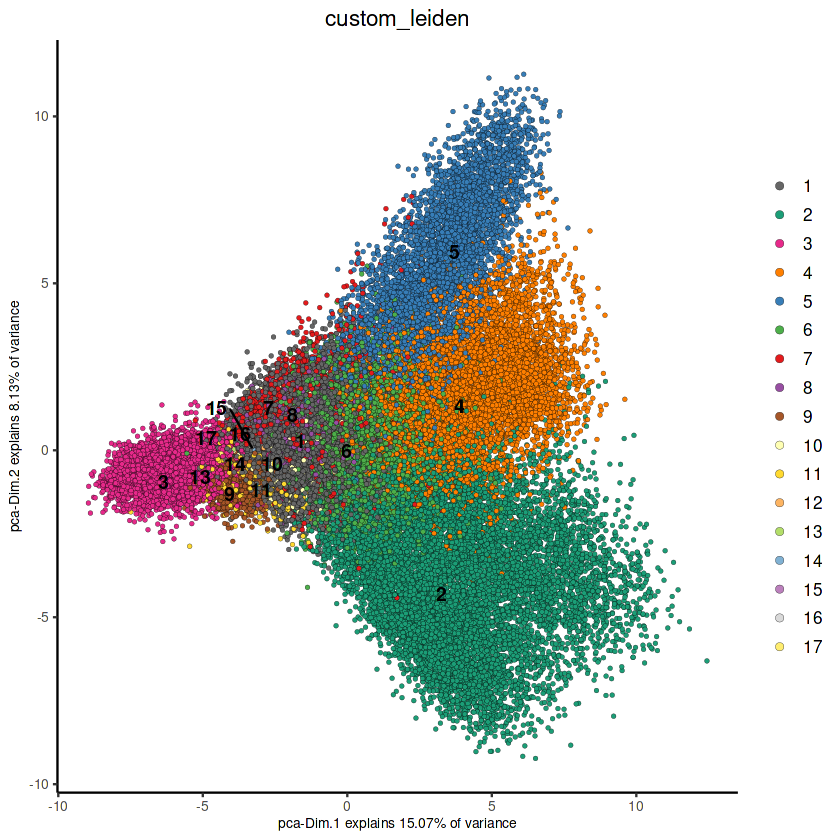

In [107]:
plotPCA(g_s1, 
        dim_reduction_name = "custom_pca",
        cell_color = "custom_leiden")

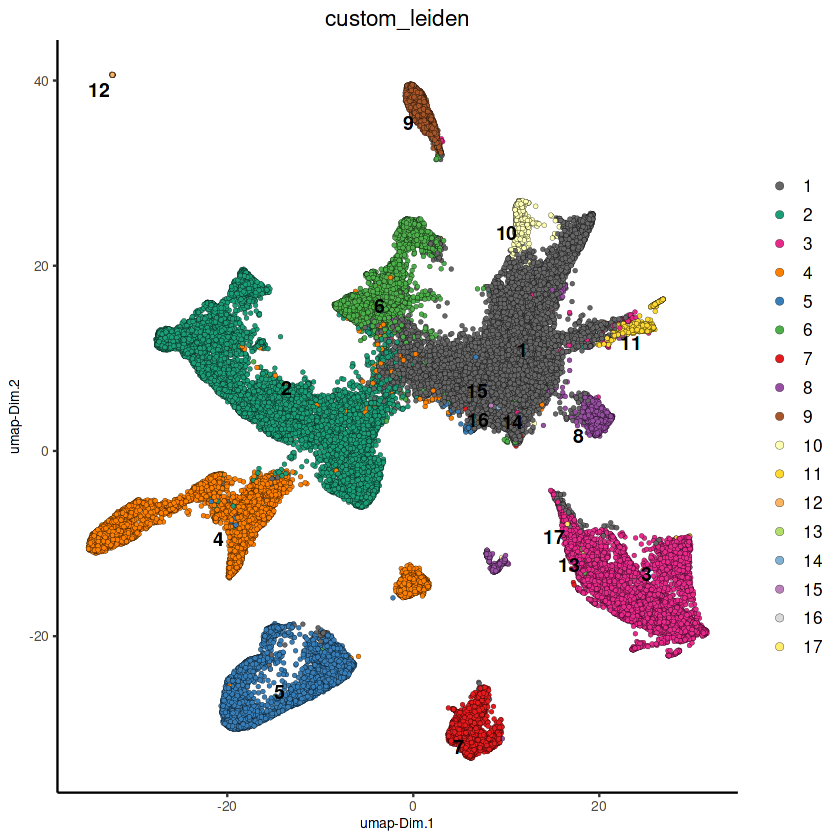

In [108]:
plotUMAP(g_s1, 
        dim_reduction_name = "custom_umap",
        cell_color = "custom_leiden")

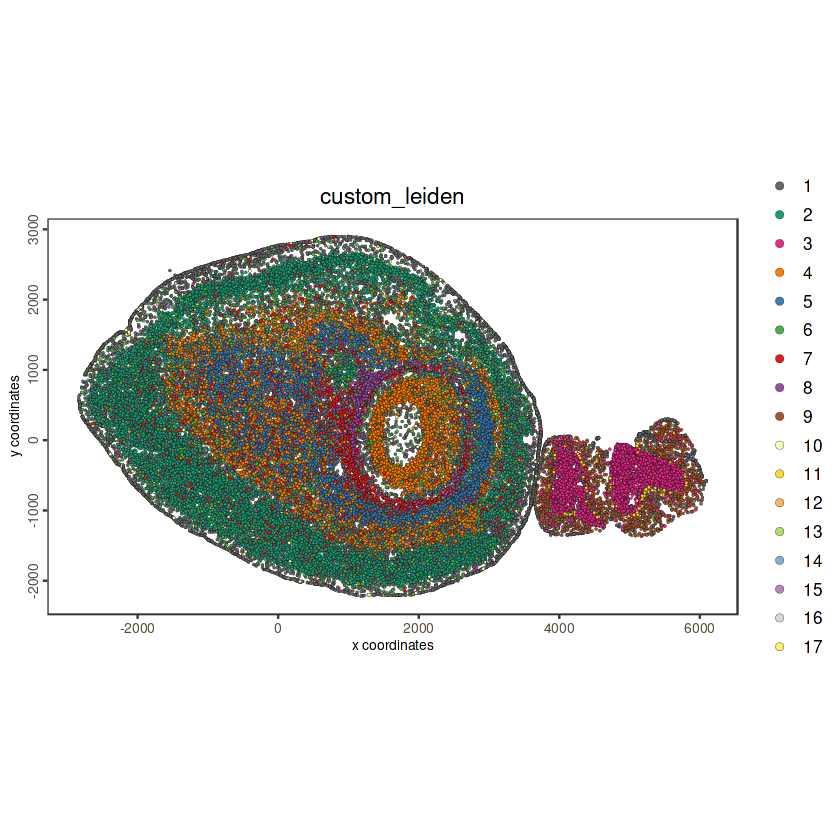

In [109]:
spatPlot2D(g_s1,
           cell_color = "custom_leiden",
           point_size = 0.5)

## Integration with scRNAseq data

Single-cell datasets lack spatial context however, they tend to have clearer separation between clusters, making it easier to see which clusters correspond to which cell types. This dataset comes from the [Mouse Brain Atlas](http://mousebrain.org) and can be downloaded using GiottoData. We can use the single-cell data to identify cell types, then transfer those labels to the MERFISH data.

### Download the single-cell dataset

In [3]:
GiottoData::getSpatialDataset(dataset = "scRNA_mouse_brain", 
                              directory = "./")

Warning message in data.table::fread(datasets_file, sep = "\t"):
“Discarded single-line footer: <<sg_mini_kidney	https://github.com/drieslab/spatial-datasets/data/2023_spatial_genomics_mouse_kidney/Raw.zip	>>”
Selected dataset links for: scRNA_mouse_brain




             dataset spatial_locs
              <char>       <char>
1: scRNA_mouse_brain             
                                                                                                                             expr_matrix
                                                                                                                                  <char>
1: https://github.com/drieslab/spatial-datasets/raw/master/data/2022_scRNAseq_mouse_brain/count_matrix/brain_sc_expression_matrix.txt.gz
                                                                                                                     metadata
                                                                                                                       <char>
1: https://github.com/drieslab/spatial-datasets/raw/master/data/2022_scRNAseq_mouse_brain/cell_metadata/brain_sc_metadata.csv
   segmentations
          <char>
1:              




Download expression matrix:



Download spatial locations:


No spatial locations found, skip this step



Download metadata:



NULL

### Read scRNAseq data

In [3]:
sc_expression <- "brain_sc_expression_matrix.txt.gz"
sc_metadata <-  "brain_sc_metadata.csv"

instructions <- createGiottoInstructions(save_plot = FALSE,
                                         show_plot = TRUE,
                                         return_plot = FALSE,
                                         python_path = NULL)

giotto_SC <- createGiottoObject(expression = sc_expression,
                                instructions = instructions)

python already initialized in this session
 active environment : 'giotto_env'
 python version : 3.10

a giotto python environment was found

Using python path:
 "/opt/r-miniconda/envs/giotto_env/bin/python"

There are non numeric or integer columns for the spatial location
 input at column position(s): 1
 The first non-numeric column will be considered as a cell ID
 to test for consistency with the expression matrix
 Other non numeric columns will be removed



### Next, a joined spatial and single cell giotto object needs to be created to transfer the cell type labels.

In [6]:
# match features
ufids <- intersect(featIDs(g_s1), featIDs(giotto_SC)) # 1126 feats in common

# strip gobjects down to remove incompatible elements in join
sc_join <- giotto() |> 
    setGiotto(giotto_SC[[c("expression", "spatial_locs"), "raw"]]) 

cell_metadata <- data.table::fread(sc_metadata)
sc_join <- addCellMetadata(sc_join, 
                           new_metadata = cell_metadata[, c("Class", "Subclass")])

spatial_join <- giotto() |>
    setGiotto(g_s1[[c("expression", "spatial_locs"), "raw", spat_unit = "cell"]])

j <- joinGiottoObjects(
    list(sc_join[ufids], spatial_join[ufids]), 
    gobject_names = c("sc", "merfish")
)
instructions(j) <- instructions

python already initialized in this session
 active environment : 'giotto_env'
 python version : 3.10

a giotto python environment was found

Using python path:
 "/opt/r-miniconda/envs/giotto_env/bin/python"

Setting expression [cell][rna] raw

Setting spatial locations [cell] raw

python already initialized in this session
 active environment : 'giotto_env'
 python version : 3.10

a giotto python environment was found

Using python path:
 "/opt/r-miniconda/envs/giotto_env/bin/python"

Setting expression [cell][rna] raw

Setting spatial locations [cell] raw

Warning message in joinGiottoObjects(list(sc_join[ufids], spatial_join[ufids]), :
“spatial locations: provenance mismatch”


### Process Joined Object (Without Integration)

completed 1: preparation

completed 2: subset expression data

completed 3: subset spatial locations

completed 4: subset cell metadata

completed 5: subset feature metadata

completed 6: subset spatial network(s)

completed 7: subsetted dimension reductions

completed 8: subsetted nearest network(s)

completed 9: subsetted spatial enrichment results




Feature type:  rna 
Number of cells removed:  191  out of  61215 
Number of feats removed:  0  out of  1126 


first scale feats and then cells

Setting expression [cell][rna] normalized

Setting expression [cell][rna] scaled

Setting dimension reduction [cell][rna] pca



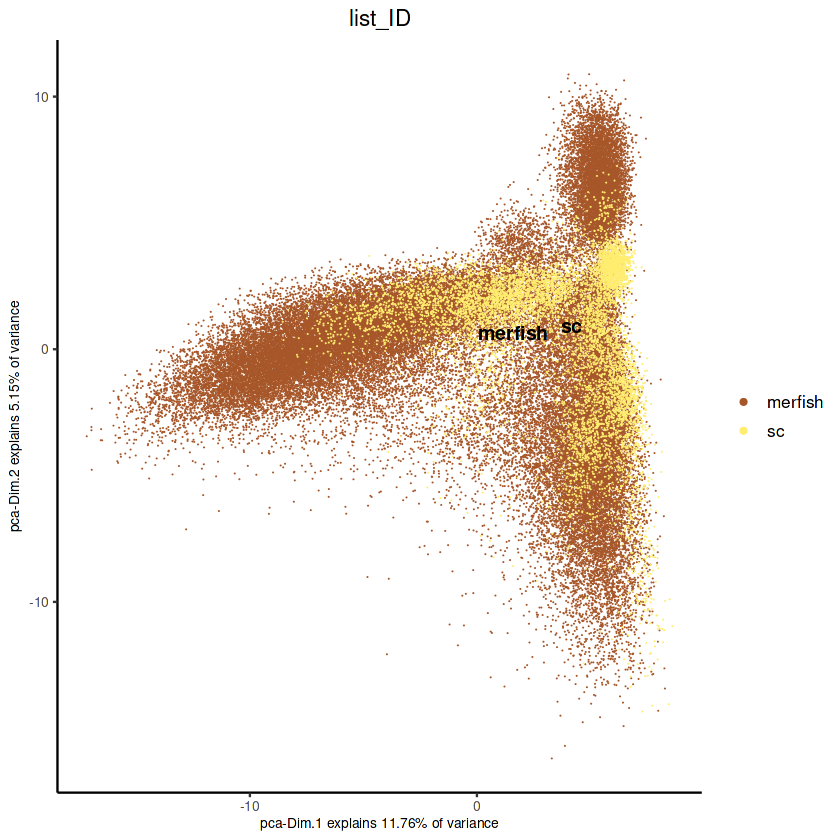

In [9]:
# Filtering
j <- filterGiotto(j,
                  expression_threshold = 1, 
                  feat_det_in_min_cells = 1, 
                  min_det_feats_per_cell = 10)

# Normalization
j <- normalizeGiotto(j) 

# PCA
j <- runPCA(j, 
            feats_to_use = NULL)

plotPCA(j,
        cell_color = "list_ID",
        point_border_stroke = 0,
        point_size = 0.3)

PCA with name: pca already exists and will be used for the screeplot



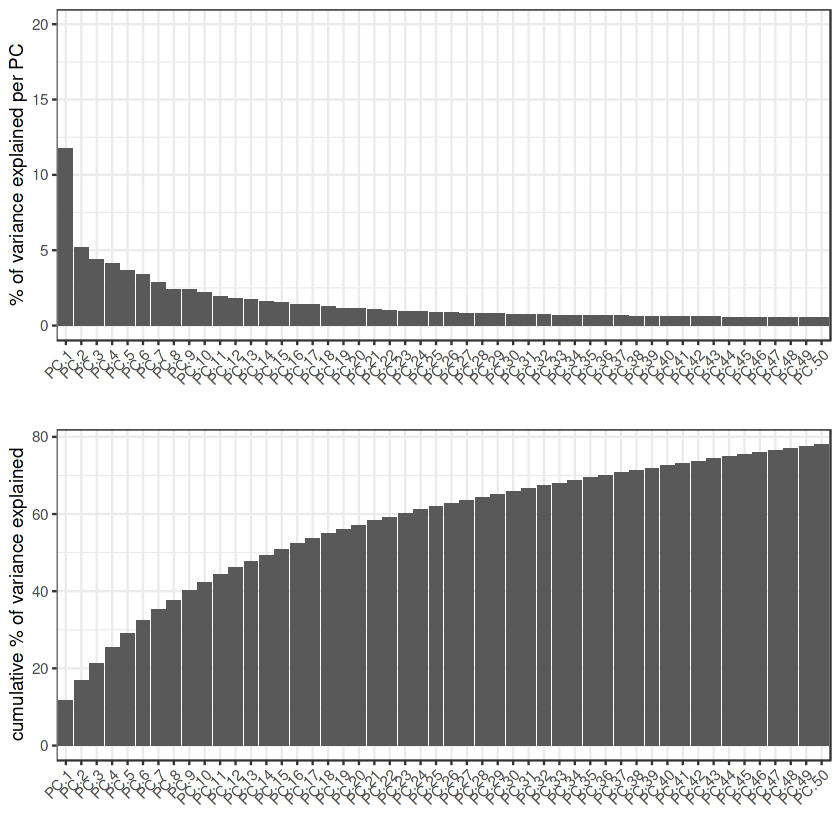

In [10]:
screePlot(j, 
          ncp = 50)

Setting dimension reduction [cell][rna] umap



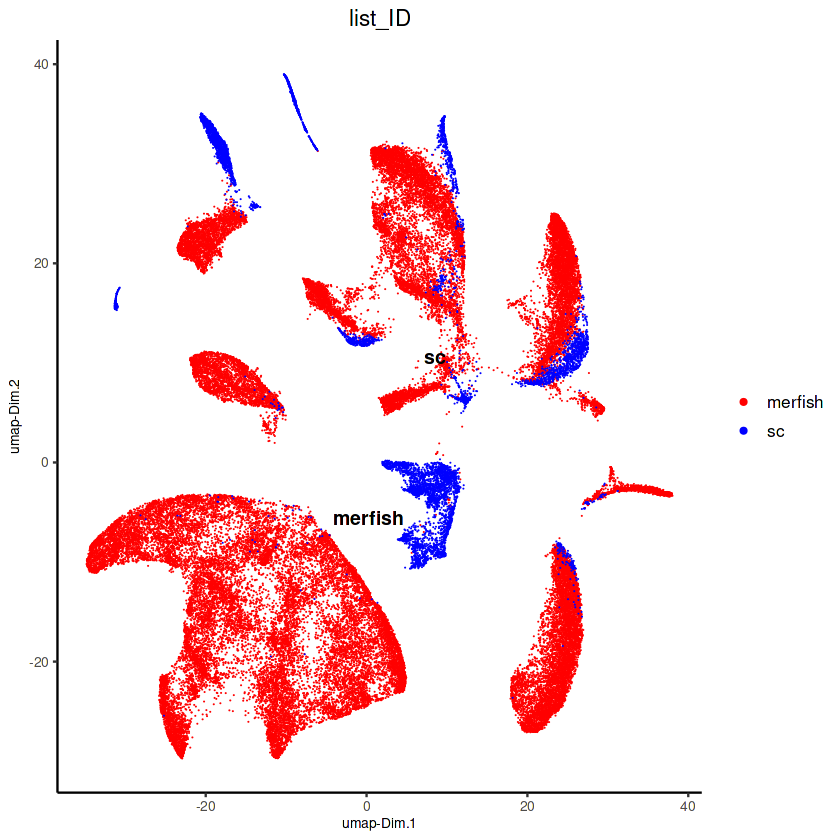

In [11]:
j <- runUMAP(j, 
             dimensions_to_use = 1:10)

plotUMAP(j, 
         cell_color = "list_ID",
         point_size = 0.3, 
         point_border_stroke = 0, 
         cell_color_code = c("red", "blue"))

### Process Joined Object (With Harmony Integration)

Run Harmony integration on the PCA space with the "list_ID" (dataset source) as the variable to remove to produce an aligned PCA space that better represents the biology of the datasets.

In [12]:
j <- runGiottoHarmony(j,
                      vars_use = "list_ID",
                      dim_reduction_name = "pca",
                      dimensions_to_use = 1:10,
                      name = "harmony")

j <- runUMAP(j, 
             dim_reduction_to_use = "harmony",
             dim_reduction_name = "harmony",
             name = "umap_harmony",
             dimensions_to_use = 1:10)

plotUMAP(j, 
         cell_color = "Class",
         dim_reduction_name = "umap_harmony", 
         point_size = 0.5, 
         select_cells = spatIDs(j, subset = list_ID == "sc"),
         point_border_stroke = 0, 
         other_point_size = 0.3)

ERROR: Error: package 'harmony' is not yet installed

 To install:
install.packages(c("harmony"))



### Label transferring

The single-cell-based cell-type annotations map to the clustering of the integrated dataset. We can now transfer these annotations using labelTransfer() from just the single cells (source_cell_ids) to the rest of the cells (merfish data cells) using kNN clustering.

In [ ]:
j <- labelTransfer(j, 
                   source_cell_ids = spatIDs(j, subset = list_ID == "sc"),
                   k = 10,
                   labels = "Class",
                   reduction_method = "harmony",
                   reduction_name = "harmony",
                   dimensions_to_use = 1:10)

plotUMAP(j, 
         cell_color = "trnsfr_Class", 
         dim_reduction_name = "umap_harmony", 
         point_size = 0.3,
         point_border_stroke = 0)



### Add transferred labels to the original merfish object

In [ ]:
j_cellmetadata <- pDataDT(j)
j_cellmetadata <- j_cellmetadata[list_ID == "merfish",]
j_cellmetadata[, cell_ID := gsub("^merfish-", "", cell_ID)]
j_cellmetadata <- j_cellmetadata[, .(cell_ID, trnsfr_Class, trnsfr_Class_prob)]

g_s1 <- addCellMetadata(g_s1, 
                        new_metadata = j_cellmetadata, 
                        by_column = TRUE, 
                        column_cell_ID = "cell_ID")

spatPlot2D(g_s1,
           cell_color = "trnsfr_Class",
           point_size = 0.5)